<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/BaSTI_Fitting/ngc6822_dc_pc_003_basti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 1999, done.
remote: Counting objects: 100% (933/933), done.
remote: Compressing objects: 100% (499/499), done.
remote: Total 1999 (delta 524), reused 729 (delta 433), pack-reused 1066 (from 1)
Receiving objects: 100% (1999/1999), 138.28 MiB | 11.43 MiB/s, done.
Resolving deltas: 100% (1025/1025), done.
Updating files: 100% (230/230), done.


In [ ]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [ ]:
Z = 0.003
Z_name = ''.join(list(str(Z))[2:])

## Preparing data

In [ ]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

Ra_center = 296.23 #degree
Dec_center = -14.80167 #degree

Distance = 500 #Kpc
a_bulge = 0.560 #Kpc
b_nulge = 0.727 #Kpc
R_body = 1.4 #Kpc

S_bulge = np.pi * a_bulge * b_nulge # Kpc^2
S_body  = np.pi * (R_body**2) - S_bulge  # Kpc^2

In [ ]:
file_address = '/content/NGC_6822/Data_V3/Final_cleaned_data_v3.csv'
df = pd.read_csv(file_address)
df = df.fillna(89.99)
df['Ks'] = df['Ks'] - Ak
df['J'] = df['J'] - Aj
df['J-Ks'] = df['J'] - df['Ks']

In [ ]:
df

,Ra(J2000) deg,Dec(J2000) deg,J,H,Ks,Types,Ref,R,J-Ks
0,296.183980,-14.780180,18.030,17.510,17.050,O,Whitelock,89.990,0.980
1,296.252290,-14.784750,17.290,16.540,16.010,O,Whitelock,89.990,1.280
2,296.204150,-14.634860,16.380,15.910,15.390,O,Whitelock,89.990,0.990
3,296.223640,-14.774730,16.240,15.580,15.060,O,Whitelock,89.990,1.180
4,296.218160,-14.880350,16.100,15.530,15.020,O,Whitelock,89.990,1.080
...,...,...,...,...,...,...,...,...,...
324,296.044067,-14.905341,18.304,17.750,17.311,C5.5,Kacharov,20.697,0.993
325,296.003693,-14.974893,18.192,17.560,17.140,C5.5,Kacharov,20.379,1.052
326,295.993561,-14.990264,17.674,16.702,15.770,C6.5,Kacharov,19.735,1.904
327,296.020050,-15.036669,17.551,17.008,16.619,C8.2,Kacharov,19.639,0.932


In [ ]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [ ]:
X = (df['J-Ks'])
Y = (df['Ks'])

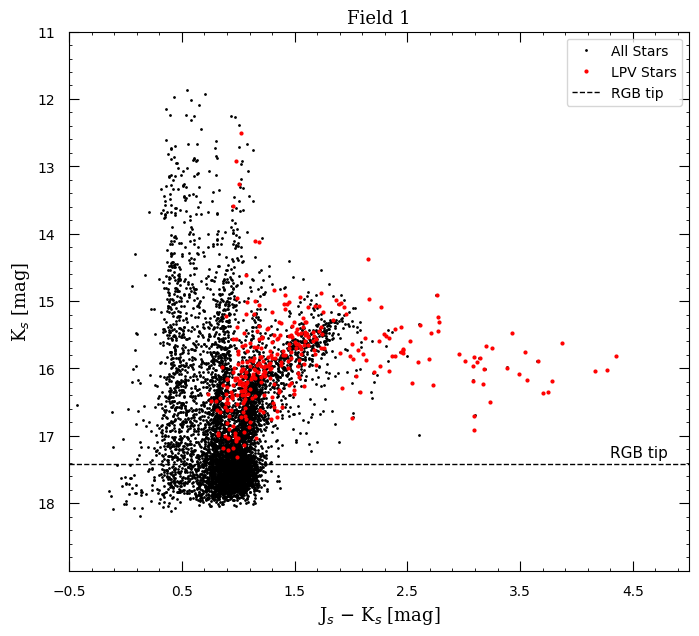

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5 , -0.5
ymax , ymin = 19  , 11

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot((df_Whitelock['Jmag(mag)']-Aj) - (df_Whitelock['Ksmag(mag)']-Ak), (df_Whitelock['Ksmag(mag)']-Ak) ,'k.', markersize = '2', label = 'All Stars')
plt.plot(X, Y,'r.', markersize = '4', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Adding Isochrones

In [ ]:
!pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-ndfdqbhm
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-ndfdqbhm
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit cd576a371a2a1f5289dede1bdd5a4f4c33b2bb52
  Preparing metadata (setup.py) ... done
  Created wheel for AstroDC: filename=AstroDC-1.0.5-py3-none-any.whl size=2586 sha256=26348c16882384475328812ccabe9b79569d56d6b20099c01a0a911994424f7a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ntbncioi/wheels/c8/2b/e3/7ae5be3175118845477ed9673ef3d2a08ff9b4da225b35d8bd
Successfully built AstroDC


In [ ]:
from AstroDC import AstroDC

In [ ]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_01.dat','ISO_01')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 14:44:37 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [ ]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_1.dat','ISO_1')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 14:46:28 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [ ]:
ISO_df_01= pd.read_csv("ISO_01.csv")
ISO_df_01['logAge'] = round(ISO_df_01['logAge'], 3)
ISO_df_01 = ISO_df_01[ISO_df_01['Kmag'] < 30]
ISO_df_01

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.003,-0.70993,6.60,0.090000,1.081690,0.090,-1.548,3.4713,3.777,0,...,0.003170,8.639,15.957,13.948,12.018,10.517,8.701,6.970,6.283,5.989
1,0.003,-0.70993,6.60,0.107089,1.227738,0.107,-1.481,3.4793,3.818,0,...,0.003170,8.473,15.730,13.649,11.682,10.230,8.494,6.825,6.137,5.846
2,0.003,-0.70993,6.60,0.116314,1.294523,0.116,-1.452,3.4826,3.838,0,...,0.003170,8.400,15.633,13.523,11.539,10.107,8.404,6.761,6.073,5.782
3,0.003,-0.70993,6.60,0.123632,1.342790,0.123,-1.425,3.4857,3.849,0,...,0.003170,8.332,15.507,13.395,11.407,9.994,8.322,6.702,6.013,5.722
4,0.003,-0.70993,6.60,0.131874,1.392891,0.132,-1.392,3.4891,3.858,0,...,0.003170,8.251,15.354,13.250,11.263,9.868,8.229,6.630,5.940,5.649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19751,0.003,-0.70993,10.05,0.881294,2.444167,0.550,3.143,3.5943,0.364,7,...,0.004429,-3.089,2.896,0.724,-1.198,-2.248,-3.149,-4.457,-5.356,-5.562
19752,0.003,-0.70993,10.05,0.881294,2.444167,0.537,3.159,3.6052,0.381,7,...,0.004432,-3.127,2.540,0.490,-1.370,-2.370,-3.227,-4.482,-5.340,-5.533
19753,0.003,-0.70993,10.05,0.881294,2.444167,0.526,3.171,3.6171,0.408,7,...,0.004419,-3.158,2.136,0.247,-1.537,-2.484,-3.297,-4.495,-5.311,-5.488
19754,0.003,-0.70993,10.05,0.881294,2.444167,0.519,3.177,3.6225,0.419,7,...,0.004413,-3.172,1.946,0.138,-1.609,-2.532,-3.328,-4.499,-5.297,-5.467


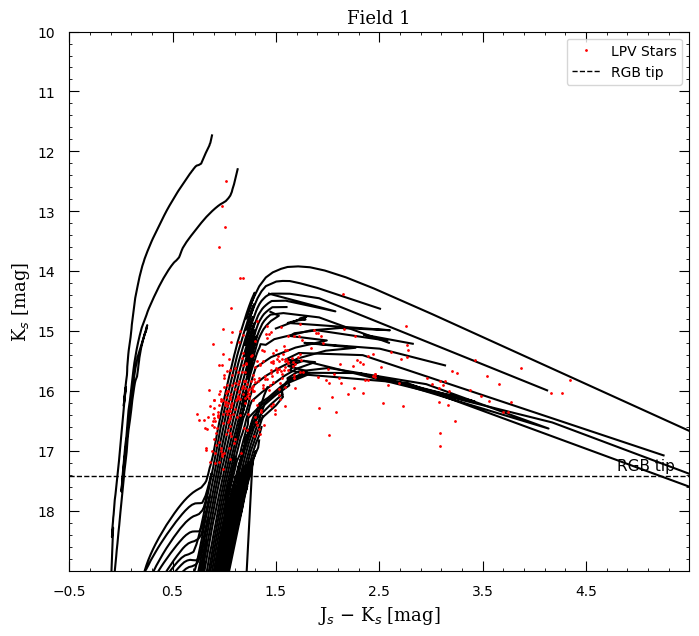

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [6.8,7,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

In [ ]:
ISO_df_1= pd.read_csv("ISO_1.csv")
ISO_df_1['logAge'] = round(ISO_df_1['logAge'], 3)
ISO_df_1 = ISO_df_1[ISO_df_1['Kmag'] < 30]
ISO_df_1

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.003,-0.70993,6.60,0.090000,1.081690,0.090,-1.548,3.4713,3.777,0,...,0.003170,8.639,15.957,13.948,12.018,10.517,8.701,6.970,6.283,5.989
1,0.003,-0.70993,6.60,0.107089,1.227738,0.107,-1.481,3.4793,3.818,0,...,0.003170,8.473,15.730,13.649,11.682,10.230,8.494,6.825,6.137,5.846
2,0.003,-0.70993,6.60,0.116314,1.294523,0.116,-1.452,3.4826,3.838,0,...,0.003170,8.400,15.633,13.523,11.539,10.107,8.404,6.761,6.073,5.782
3,0.003,-0.70993,6.60,0.123632,1.342790,0.123,-1.425,3.4857,3.849,0,...,0.003170,8.332,15.507,13.395,11.407,9.994,8.322,6.702,6.013,5.722
4,0.003,-0.70993,6.60,0.131874,1.392891,0.132,-1.392,3.4891,3.858,0,...,0.003170,8.251,15.354,13.250,11.263,9.868,8.229,6.630,5.940,5.649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20195,0.003,-0.70993,10.05,0.881294,2.444167,0.550,3.143,3.5943,0.364,7,...,0.004429,-3.089,2.896,0.724,-1.198,-2.248,-3.149,-4.457,-5.356,-5.562
20196,0.003,-0.70993,10.05,0.881294,2.444167,0.537,3.159,3.6052,0.381,7,...,0.004432,-3.127,2.540,0.490,-1.370,-2.370,-3.227,-4.482,-5.340,-5.533
20197,0.003,-0.70993,10.05,0.881294,2.444167,0.526,3.171,3.6171,0.408,7,...,0.004419,-3.158,2.136,0.247,-1.537,-2.484,-3.297,-4.495,-5.311,-5.488
20198,0.003,-0.70993,10.05,0.881294,2.444167,0.519,3.177,3.6225,0.419,7,...,0.004413,-3.172,1.946,0.138,-1.609,-2.532,-3.328,-4.499,-5.297,-5.467


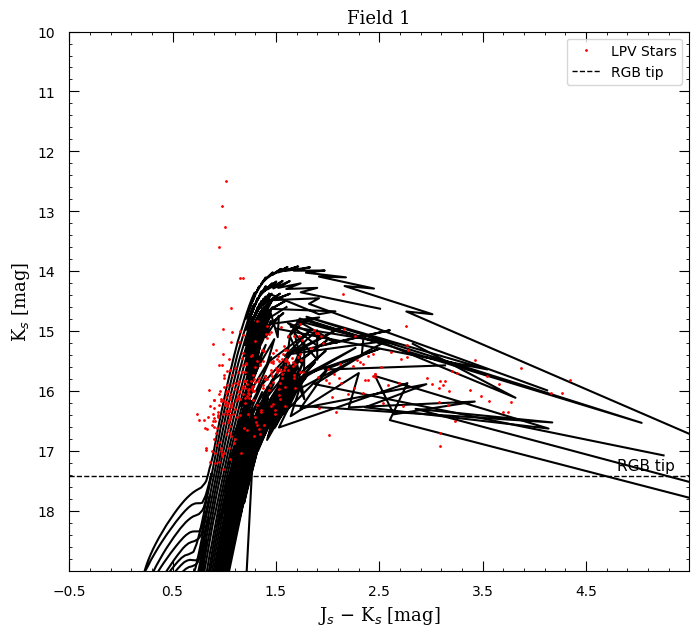

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Jmag'])  -  (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')


#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Data Correction

Selected years

In [ ]:
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]
LOG_AGE_C   = [8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7]
LOG_AGE_O   = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,9.8,9.9,10,10.1]

limitation lines

In [ ]:
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_peak_limit = (J_min) - ( K_min)

/tmp/ipython-input-4178927857.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
/tmp/ipython-input-4178927857.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])


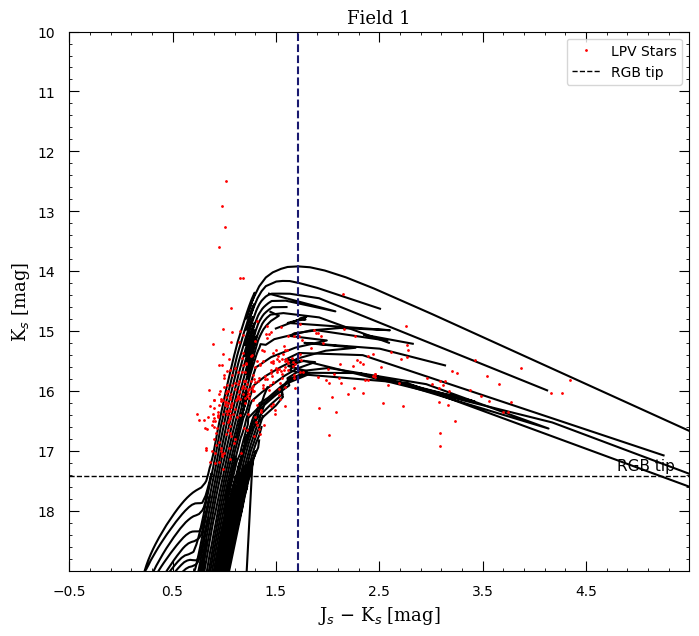

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

plt.legend(loc='upper right')
plt.savefig('CMD_peak_'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

Slope : Carbon

In [ ]:
df_Correction_C = ISO_df_01
df_Correction_C['J_K'] = df_Correction_C['Jmag'] - df_Correction_C['Kmag']
df_Correction_C = df_Correction_C[df_Correction_C['logAge'].isin(LOG_AGE_C)]
df_Correction_C = df_Correction_C[df_Correction_C['Kmag'] + DM  < RGBT ]
df_Correction_C = df_Correction_C[df_Correction_C['J_K'] > X_peak_limit].reset_index(drop=True)

In [ ]:
Slope_C = []
Slope_C_weight = []
for i in range(0,len(df_Correction_C)-1):
  Slope_C_prime = []
  Slope_C_weight_prime = []
  if df_Correction_C['logAge'][i+1] == df_Correction_C['logAge'][i] :
    K_diff = (df_Correction_C['Kmag'][i+1] - df_Correction_C['Kmag'][i])
    J_K_diff = df_Correction_C['J_K'][i+1] - df_Correction_C['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 :
        Slope_C_prime.append( K_diff / J_K_diff )
        Slope_C_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_C_weight_prime) > 0 :
    Slope_C.append(sum((Slope_C_weight_prime / sum(Slope_C_weight_prime)) * Slope_C_prime))
    Slope_C_weight.append(sum(Slope_C_weight_prime))
Slope_C = sum((Slope_C_weight / sum(Slope_C_weight))*Slope_C)

Slope : Oxygen

In [ ]:
LOG_AGE_O_prime = LOG_AGE_O[0:3]

df_Correction_O = ISO_df_01
df_Correction_O['J_K'] = df_Correction_O['Jmag'] - df_Correction_O['Kmag']
df_Correction_O = df_Correction_O[df_Correction_O['logAge'].isin(LOG_AGE_O_prime)]
df_Correction_O = df_Correction_O[df_Correction_O['Kmag'] + DM  < RGBT ]
df_Correction_O = df_Correction_O[df_Correction_O['J_K'] > X_peak_limit].reset_index(drop=True)

In [ ]:
Slope_O = []
Slope_O_weight = []
for i in range(0,len(df_Correction_O)-1):
  Slope_O_prime = []
  Slope_O_weight_prime = []
  if df_Correction_O['logAge'][i+1] == df_Correction_O['logAge'][i] :
    K_diff = (df_Correction_O['Kmag'][i+1] - df_Correction_O['Kmag'][i])
    J_K_diff = df_Correction_O['J_K'][i+1] - df_Correction_O['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 :
        Slope_O_prime.append( K_diff / J_K_diff )
        Slope_O_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_O_weight_prime) > 0 :
    Slope_O.append(sum((Slope_O_weight_prime / sum(Slope_O_weight_prime)) * Slope_O_prime))
    Slope_O_weight.append(sum(Slope_O_weight_prime))
Slope_O = sum((Slope_O_weight / sum(Slope_O_weight))*Slope_O)

In [ ]:
print('Slope_C : ' + str(Slope_C))
print('Slope_O : ' + str(Slope_O))

Slope_C : 0.3851193330308033
Slope_O : 0.6631967021824023


Slope : Visualization

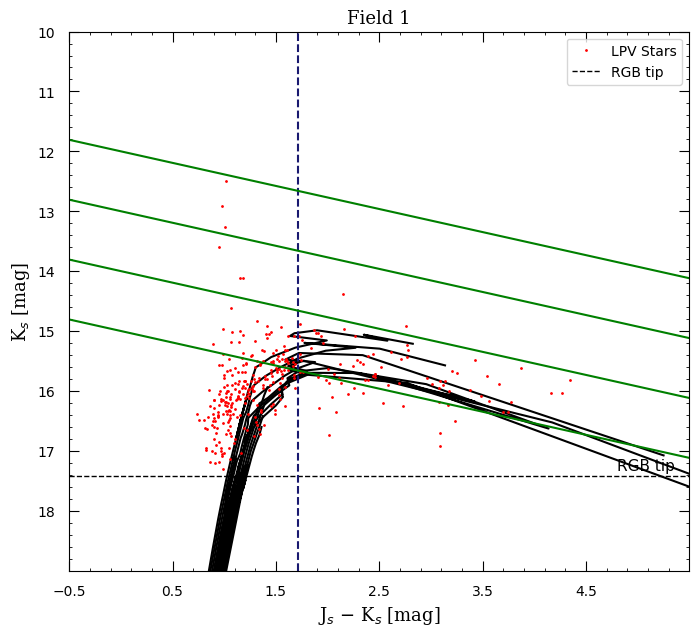

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

/tmp/ipython-input-1417502321.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
/tmp/ipython-input-1417502321.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])


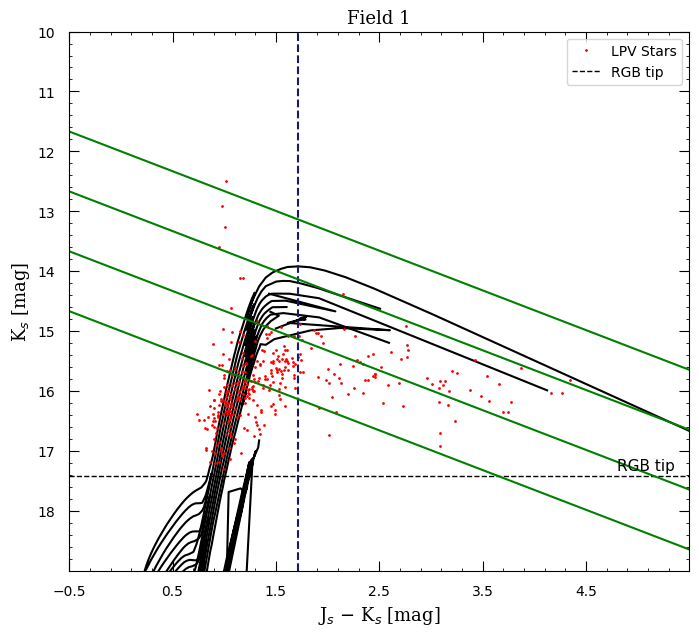

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_O
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = ( J_min - Aj )  -  ( K_min - Ak )
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slop lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_O * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

Calculation

In [ ]:
df_prime = df[(df['J-Ks']) > X_peak_limit]
df_prime['Ks_Corrected_C'] = (df_prime['Ks']) + (Slope_C * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['Ks_Corrected_O'] = (df_prime['Ks']) + (Slope_O * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['J-Ks_Corrected'] = X_peak_limit

In [ ]:
X_Corrected_C =  df_prime['J-Ks_Corrected']
Y_Corrected_C =  df_prime['Ks_Corrected_C']

/tmp/ipython-input-3031563562.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
/tmp/ipython-input-3031563562.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])


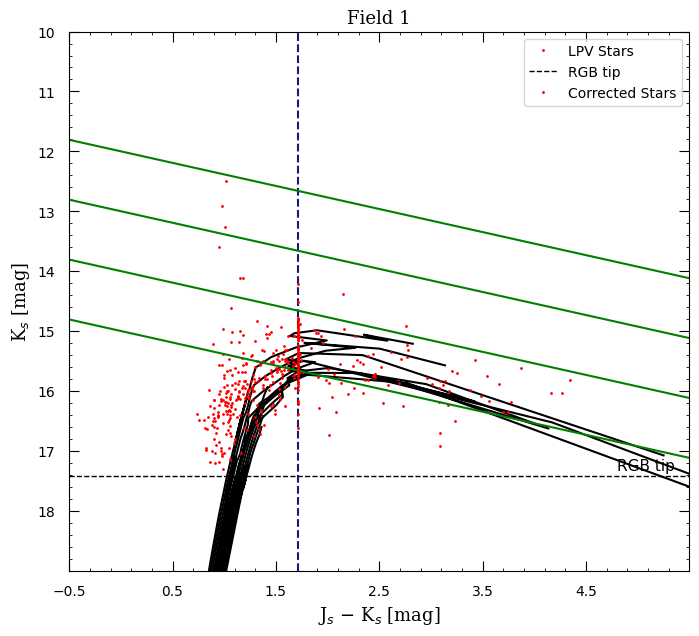

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

#Corrected Stars with carbon slope
plt.plot(X_Corrected_C, Y_Corrected_C,'r.', markersize = '2', label = 'Corrected Stars')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

In [ ]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data_BaSTI.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[ Mag_Mass['Z'] == Z].reset_index(drop=True)

In [ ]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
0,0.003,-0.538000,-4.810000,NaN,-11.827
1,0.003,-0.449000,-3.763000,-11.827,-11.408
2,0.003,-0.219000,-1.134000,-11.408,-10.990
3,0.003,-0.311000,-2.151000,-10.990,-10.571
4,0.003,-0.211000,-1.093000,-10.571,-10.152
5,0.003,-0.676000,-5.818000,-10.152,-10.081
6,0.003,-0.693627,-6.052916,-10.081,-9.915
7,0.003,-0.927081,-8.367773,-9.915,-9.767
8,0.003,-0.457800,-3.784304,-9.767,-9.492
9,0.003,-0.362927,-2.883770,-9.492,-9.296


In [ ]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [ ]:
a,b = Mag_Mass_a_b_Calculator(Mag_Mass, df_prime['Ks_Corrected_C'].loc[df_prime.index[10]] - DM )

/tmp/ipython-input-3155711575.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
/tmp/ipython-input-3155711575.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
/tmp/ipython-input-3155711575.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit

In [ ]:
print(f'a: {a}   b: {b}')

a: -0.2624667025915737   b: -1.996038821941552


$Log(M/M_s) = a \times K_s + b$

In [ ]:
O_index = []
C_index = []
for i in df_prime.index:
  Ks = df_prime['Ks_Corrected_C'].loc[i] - DM
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, Ks)
  M = 10 ** (a * Ks + b)
  if M > 1.1 and M < 4 :
    C_index.append(i)
  else :
    O_index.append(i)

/tmp/ipython-input-3155711575.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
/tmp/ipython-input-3155711575.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
/tmp/ipython-input-3155711575.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit

In [ ]:
df_Corrected = df
for i in df_prime.index :
  print(i)
  df_Corrected.loc[i,'J-Ks'] = df_prime.loc[i,'J-Ks_Corrected']
  if i in C_index :
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_C']
    print('C Star --> ' + str(i) )
  else:
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_O']
    print('O Star --> ' + str(i) )

15
O Star --> 15
16
O Star --> 16
20
C Star --> 20
21
O Star --> 21
22
C Star --> 22
23
O Star --> 23
24
C Star --> 24
25
C Star --> 25
26
C Star --> 26
27
C Star --> 27
28
O Star --> 28
29
C Star --> 29
30
C Star --> 30
31
C Star --> 31
32
C Star --> 32
33
O Star --> 33
34
C Star --> 34
35
C Star --> 35
36
C Star --> 36
37
C Star --> 37
38
C Star --> 38
39
O Star --> 39
40
C Star --> 40
41
C Star --> 41
42
C Star --> 42
43
C Star --> 43
44
C Star --> 44
45
C Star --> 45
46
C Star --> 46
47
C Star --> 47
48
C Star --> 48
49
C Star --> 49
50
C Star --> 50
51
C Star --> 51
52
C Star --> 52
53
C Star --> 53
54
C Star --> 54
55
C Star --> 55
56
C Star --> 56
57
C Star --> 57
58
C Star --> 58
59
C Star --> 59
67
C Star --> 67
68
C Star --> 68
69
C Star --> 69
70
C Star --> 70
71
C Star --> 71
72
C Star --> 72
73
C Star --> 73
74
O Star --> 74
75
O Star --> 75
77
C Star --> 77
78
C Star --> 78
79
C Star --> 79
80
C Star --> 80
81
C Star --> 81
82
C Star --> 82
83
C Star --> 83
84
C Star --> 

In [ ]:
df_Corrected

,Ra(J2000) deg,Dec(J2000) deg,J,H,Ks,Types,Ref,R,J-Ks
0,296.183980,-14.780180,18.030,17.510,17.050000,O,Whitelock,89.990,0.980
1,296.252290,-14.784750,17.290,16.540,16.010000,O,Whitelock,89.990,1.280
2,296.204150,-14.634860,16.380,15.910,15.390000,O,Whitelock,89.990,0.990
3,296.223640,-14.774730,16.240,15.580,15.060000,O,Whitelock,89.990,1.180
4,296.218160,-14.880350,16.100,15.530,15.020000,O,Whitelock,89.990,1.080
...,...,...,...,...,...,...,...,...,...
324,296.044067,-14.905341,18.304,17.750,17.311000,C5.5,Kacharov,20.697,0.993
325,296.003693,-14.974893,18.192,17.560,17.140000,C5.5,Kacharov,20.379,1.052
326,295.993561,-14.990264,17.674,16.702,15.645319,C6.5,Kacharov,19.735,1.716
327,296.020050,-15.036669,17.551,17.008,16.619000,C8.2,Kacharov,19.639,0.932


/tmp/ipython-input-2458461432.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
/tmp/ipython-input-2458461432.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])


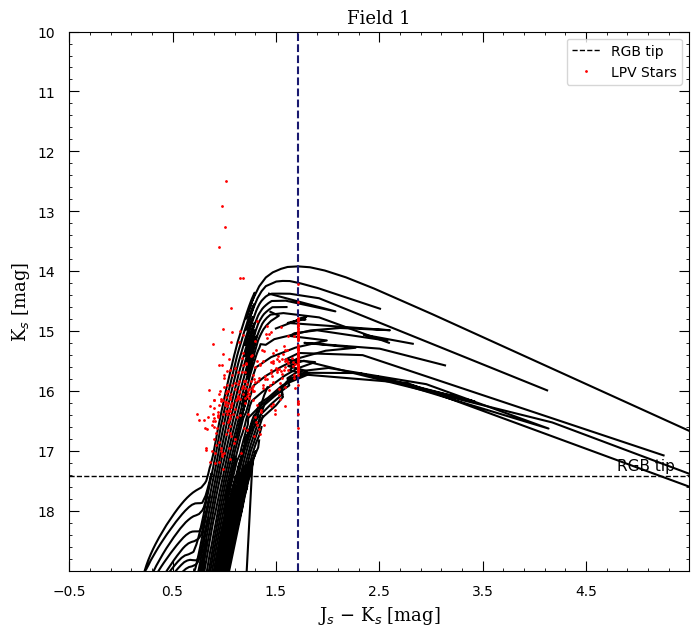

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#All stars
plt.plot(df_Corrected['J-Ks'], df_Corrected['Ks'],'r.', markersize = '2', label = 'LPV Stars')

plt.legend(loc='upper right')
plt.savefig('Data-Correction-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

# Parameters Calculation

In [ ]:
df_final = df_Corrected
df_final

,Ra(J2000) deg,Dec(J2000) deg,J,H,Ks,Types,Ref,R,J-Ks
0,296.183980,-14.780180,18.030,17.510,17.050000,O,Whitelock,89.990,0.980
1,296.252290,-14.784750,17.290,16.540,16.010000,O,Whitelock,89.990,1.280
2,296.204150,-14.634860,16.380,15.910,15.390000,O,Whitelock,89.990,0.990
3,296.223640,-14.774730,16.240,15.580,15.060000,O,Whitelock,89.990,1.180
4,296.218160,-14.880350,16.100,15.530,15.020000,O,Whitelock,89.990,1.080
...,...,...,...,...,...,...,...,...,...
324,296.044067,-14.905341,18.304,17.750,17.311000,C5.5,Kacharov,20.697,0.993
325,296.003693,-14.974893,18.192,17.560,17.140000,C5.5,Kacharov,20.379,1.052
326,295.993561,-14.990264,17.674,16.702,15.645319,C6.5,Kacharov,19.735,1.716
327,296.020050,-15.036669,17.551,17.008,16.619000,C8.2,Kacharov,19.639,0.932


## Mag_Mass relation

$Log(M/M_s) = a \times K_s + b $

In [ ]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data_BaSTI.csv')
Mag_Mass = Mag_Mass[Mag_Mass['Z'] == Z]

In [ ]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],5)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b , Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected]

In [ ]:
df_final['Log(M/Ms)'] = np.nan
df_final['M/Ms'] = np.nan
for i in df_final.index :
  a , b , model = Mag_Mass_a_b_Calculator(Mag_Mass, float(df_final.loc[i,'Ks'] - DM))
  df_final.loc[i,'Log(M/Ms)'] = a * (df_final.loc[i,'Ks'] - DM) +  b
  df_final.loc[i,'M/Ms'] = pow( 10 , a * (df_final.loc[i,'Ks'] - DM) +  b )

/tmp/ipython-input-3558720192.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
/tmp/ipython-input-3558720192.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
/tmp/ipython-input-3558720192.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
/tmp/ipython-input-3558720192.py:5: F

In [ ]:
df_final

,Ra(J2000) deg,Dec(J2000) deg,J,H,Ks,Types,Ref,R,J-Ks,Log(M/Ms),M/Ms
0,296.183980,-14.780180,18.030,17.510,17.050000,O,Whitelock,89.990,0.980,-0.040800,0.910332
1,296.252290,-14.784750,17.290,16.540,16.010000,O,Whitelock,89.990,1.280,0.135880,1.367351
2,296.204150,-14.634860,16.380,15.910,15.390000,O,Whitelock,89.990,0.990,0.125900,1.336286
3,296.223640,-14.774730,16.240,15.580,15.060000,O,Whitelock,89.990,1.180,0.268783,1.856878
4,296.218160,-14.880350,16.100,15.530,15.020000,O,Whitelock,89.990,1.080,0.286249,1.933077
...,...,...,...,...,...,...,...,...,...,...,...
324,296.044067,-14.905341,18.304,17.750,17.311000,C5.5,Kacharov,20.697,0.993,-0.097698,0.798550
325,296.003693,-14.974893,18.192,17.560,17.140000,C5.5,Kacharov,20.379,1.052,-0.060420,0.870122
326,295.993561,-14.990264,17.674,16.702,15.645319,C6.5,Kacharov,19.735,1.716,0.052430,1.128314
327,296.020050,-15.036669,17.551,17.008,16.619000,C8.2,Kacharov,19.639,0.932,0.051763,1.126582


(array([ 75., 201.,  32.,  14.,   3.,   0.,   1.,   0.,   1.,   2.]),
 array([-0.097698 ,  0.0375168,  0.1727316,  0.3079464,  0.4431612,
         0.578376 ,  0.7135908,  0.8488056,  0.9840204,  1.1192352,
         1.25445  ]),
 <BarContainer object of 10 artists>)

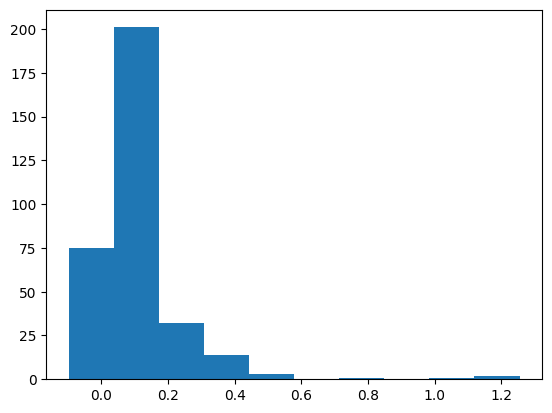

In [ ]:
plt.hist(df_final['Log(M/Ms)'])

(array([321.,   4.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.79854979,  2.51528904,  4.23202829,  5.94876754,  7.66550679,
         9.38224603, 11.09898528, 12.81572453, 14.53246378, 16.24920303,
        17.96594228]),
 <BarContainer object of 10 artists>)

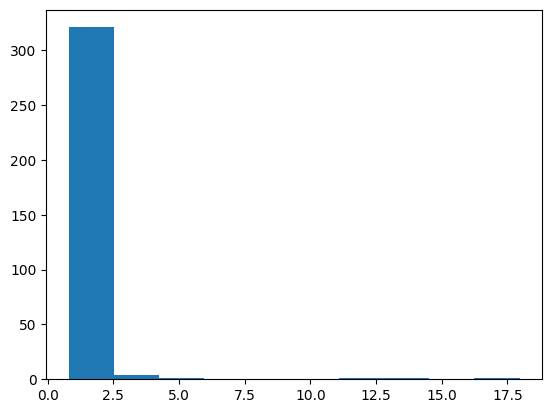

In [ ]:
plt.hist(df_final['M/Ms'])

## Mass_Age relation

$ Log(t) = a \times Log(M/M_s) + b $

In [ ]:
Mass_Age = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Age_relation_data_BaSTI.csv')
Mass_Age = Mass_Age[Mass_Age['Z'] == Z]

In [ ]:
Mass_Age

,Z,a,b,M validity range (lower limit),M validity range (upper limit)
12,0.003,-3.602377,9.859194,NaN,0.057
13,0.003,-3.273316,9.840359,0.057,0.149
14,0.003,-2.778871,9.766590,0.149,0.212
15,0.003,-2.090270,9.620243,0.212,0.296
16,0.003,-2.676862,9.794302,0.296,0.521
17,0.003,-2.406130,9.653082,0.521,0.687
18,0.003,-2.183950,9.500438,0.687,0.824
19,0.003,-1.926168,9.287806,0.824,0.940
20,0.003,-1.685000,9.122000,0.940,1.090
21,0.003,-1.269000,8.669000,1.090,1.325


In [ ]:
def Mass_Age_a_b_Calculator(Relation_DataFrame, M_selected):
  if M_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['M validity range (upper limit)'] < M_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['b'])
  return a , b

In [ ]:
a , b = Mass_Age_a_b_Calculator(Mass_Age, df_final.loc[df_final.index[10],'Log(M/Ms)'])
print(f'a: {a}   b: {b}')

a: -3.273316293764408   b: 9.840358707914366


/tmp/ipython-input-2869573589.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if M_selected <= Relation_DataFrame.iloc[0][-1] :
/tmp/ipython-input-2869573589.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
/tmp/ipython-input-2869573589.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower_limit = round(Relation_DataFrame[Relation_DataFrame['M validity range (upper limi

In [ ]:
df_final['Log(t)'] = np.nan
df_final['t'] = np.nan
for i in df_final.index :
  a , b = Mass_Age_a_b_Calculator(Mass_Age, round(df_final.loc[i,'Log(M/Ms)'],3))
  df_final.loc[i,'Log(t)'] = a * (df_final.loc[i,'Log(M/Ms)']) +  b
  df_final.loc[i,'t'] = pow( 10 , df_final.loc[i,'Log(t)'] )

/tmp/ipython-input-2869573589.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if M_selected <= Relation_DataFrame.iloc[0][-1] :
/tmp/ipython-input-2869573589.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if M_selected <= Relation_DataFrame.iloc[0][-1] :
/tmp/ipython-input-2869573589.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
/tmp/ipython-input-2869573589.py:9: F

In [ ]:
df_final

,Ra(J2000) deg,Dec(J2000) deg,J,H,Ks,Types,Ref,R,J-Ks,Log(M/Ms),M/Ms,Log(t),t
0,296.183980,-14.780180,18.030,17.510,17.050000,O,Whitelock,89.990,0.980,-0.040800,0.910332,10.006171,1.014310e+10
1,296.252290,-14.784750,17.290,16.540,16.010000,O,Whitelock,89.990,1.280,0.135880,1.367351,9.395580,2.486454e+09
2,296.204150,-14.634860,16.380,15.910,15.390000,O,Whitelock,89.990,0.990,0.125900,1.336286,9.428250,2.680709e+09
3,296.223640,-14.774730,16.240,15.580,15.060000,O,Whitelock,89.990,1.180,0.268783,1.856878,9.058413,1.143966e+09
4,296.218160,-14.880350,16.100,15.530,15.020000,O,Whitelock,89.990,1.080,0.286249,1.933077,9.021905,1.051731e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,296.044067,-14.905341,18.304,17.750,17.311000,C5.5,Kacharov,20.697,0.993,-0.097698,0.798550,10.211139,1.626068e+10
325,296.003693,-14.974893,18.192,17.560,17.140000,C5.5,Kacharov,20.379,1.052,-0.060420,0.870122,10.076849,1.193574e+10
326,295.993561,-14.990264,17.674,16.702,15.645319,C6.5,Kacharov,19.735,1.716,0.052430,1.128314,9.670321,4.680807e+09
327,296.020050,-15.036669,17.551,17.008,16.619000,C8.2,Kacharov,19.639,0.932,0.051763,1.126582,9.672724,4.706778e+09


(array([  3.,   0.,   1.,   0.,   3.,  13.,  32., 137., 101.,  39.]),
 array([ 7.07710295,  7.39050652,  7.70391008,  8.01731365,  8.33071722,
         8.64412079,  8.95752435,  9.27092792,  9.58433149,  9.89773505,
        10.21113862]),
 <BarContainer object of 10 artists>)

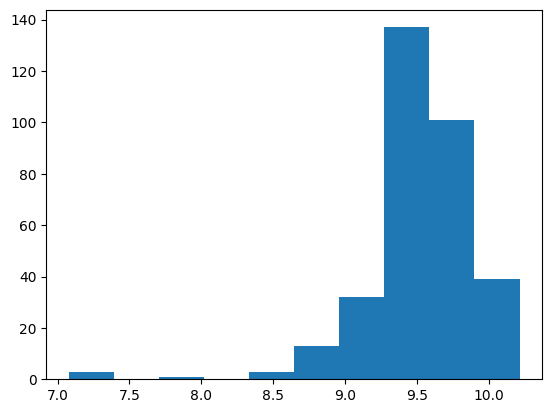

In [ ]:
plt.hist(df_final['Log(t)'])

(array([ 48., 103.,  93.,  29.,  21.,  23.,   7.,   3.,   1.,   1.]),
 array([1.19427117e+07, 1.63681613e+09, 3.26168955e+09, 4.88656296e+09,
        6.51143638e+09, 8.13630980e+09, 9.76118322e+09, 1.13860566e+10,
        1.30109301e+10, 1.46358035e+10, 1.62606769e+10]),
 <BarContainer object of 10 artists>)

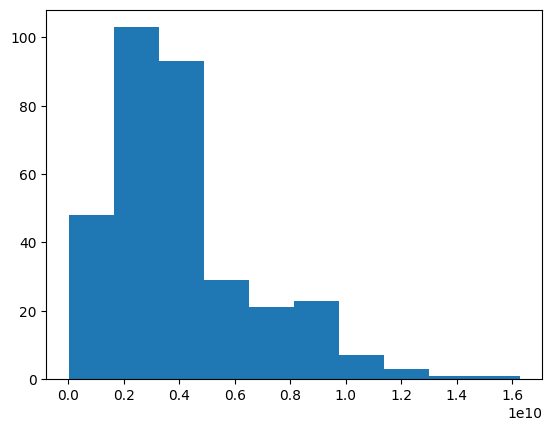

In [ ]:
plt.hist(df_final['t'])

## Mass_Pulsation relation

In [ ]:
Mass_Pulsation = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Pulsation_relation_data.csv', encoding= 'unicode_escape')
Mass_Pulsation = Mass_Pulsation[Mass_Pulsation['Z'] == Z]

In [ ]:
Mass_Pulsation

,Z,I,a,b,c,D
40,0.003,1,1.531,1.826,0.151,-5.323
41,0.003,2,3.421,1.337,0.405,0.000
42,0.003,3,2.566,0.306,0.290,0.000
43,0.003,4,1.288,0.647,0.127,0.000


In [ ]:
def Mass_Pulsation_a_b_c_D_Calculator(Relation_DataFrame, i ):
  a = Relation_DataFrame.iloc[i-1]['a']
  b = Relation_DataFrame.iloc[i-1]['b']
  c = Relation_DataFrame.iloc[i-1]['c']
  D = Relation_DataFrame.iloc[0]['D']
  return a , b , c , D

In [ ]:
a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation,2)
print(f'a: {a}   b: {b}  c: {c}  D: {D}')

a: 3.421   b: 1.337  c: 0.405  D: -5.323


$ Log(δt) = Log(t) + D + Σ_1^4 a_i exp[-(Log(M/M_s) - b_i)^2 / c_i^2]$

In [ ]:
df_final['Log(dt)'] = np.nan
df_final['dt'] = np.nan
for i in df_final.index :
  log_dt = []
  log_t = df_final.loc[i,'Log(t)']
  log_M_Ms = df_final.loc[i,'Log(M/Ms)']
  for j in range(1,5):
    a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation, j )
    s = a * np.exp(-((log_M_Ms-b)**2)/(c**2))
    log_dt.append(s)

  df_final.loc[i,'Log(dt)'] = log_t + D + np.sum(log_dt)
  df_final.loc[i,'dt'] = pow( 10 , df_final.loc[i,'Log(dt)'] )

In [ ]:
df_final

,Ra(J2000) deg,Dec(J2000) deg,J,H,Ks,Types,Ref,R,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
0,296.183980,-14.780180,18.030,17.510,17.050000,O,Whitelock,89.990,0.980,-0.040800,0.910332,10.006171,1.014310e+10,5.297217,1.982516e+05
1,296.252290,-14.784750,17.290,16.540,16.010000,O,Whitelock,89.990,1.280,0.135880,1.367351,9.395580,2.486454e+09,5.891985,7.798031e+05
2,296.204150,-14.634860,16.380,15.910,15.390000,O,Whitelock,89.990,0.990,0.125900,1.336286,9.428250,2.680709e+09,5.850536,7.088205e+05
3,296.223640,-14.774730,16.240,15.580,15.060000,O,Whitelock,89.990,1.180,0.268783,1.856878,9.058413,1.143966e+09,6.262937,1.832049e+06
4,296.218160,-14.880350,16.100,15.530,15.020000,O,Whitelock,89.990,1.080,0.286249,1.933077,9.021905,1.051731e+09,6.257515,1.809319e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,296.044067,-14.905341,18.304,17.750,17.311000,C5.5,Kacharov,20.697,0.993,-0.097698,0.798550,10.211139,1.626068e+10,5.257694,1.810063e+05
325,296.003693,-14.974893,18.192,17.560,17.140000,C5.5,Kacharov,20.379,1.052,-0.060420,0.870122,10.076849,1.193574e+10,5.273768,1.878312e+05
326,295.993561,-14.990264,17.674,16.702,15.645319,C6.5,Kacharov,19.735,1.716,0.052430,1.128314,9.670321,4.680807e+09,5.542065,3.483891e+05
327,296.020050,-15.036669,17.551,17.008,16.619000,C8.2,Kacharov,19.639,0.932,0.051763,1.126582,9.672724,4.706778e+09,5.539664,3.464688e+05


(array([  1.,   1.,   0.,   1.,   0.,   3.,  75., 107.,  95.,  46.]),
 array([3.65230301, 3.91338737, 4.17447173, 4.4355561 , 4.69664046,
        4.95772483, 5.21880919, 5.47989355, 5.74097792, 6.00206228,
        6.26314664]),
 <BarContainer object of 10 artists>)

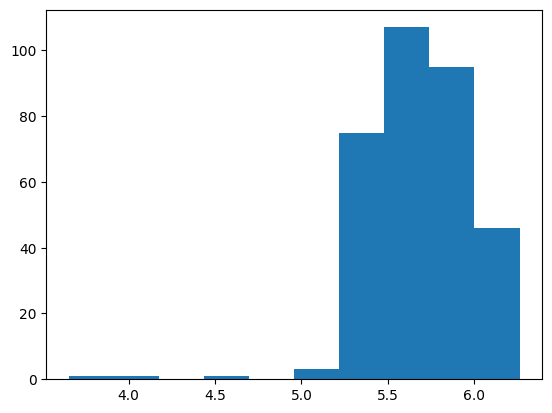

In [ ]:
plt.hist(df_final['Log(dt)'])

(array([ 11., 107.,  70.,  66.,  25.,   6.,   7.,   7.,   7.,  23.]),
 array([   4490.58588287,  187334.8503022 ,  370179.11472154,
         553023.37914088,  735867.64356021,  918711.90797955,
        1101556.17239889, 1284400.43681822, 1467244.70123756,
        1650088.9656569 , 1832933.23007623]),
 <BarContainer object of 10 artists>)

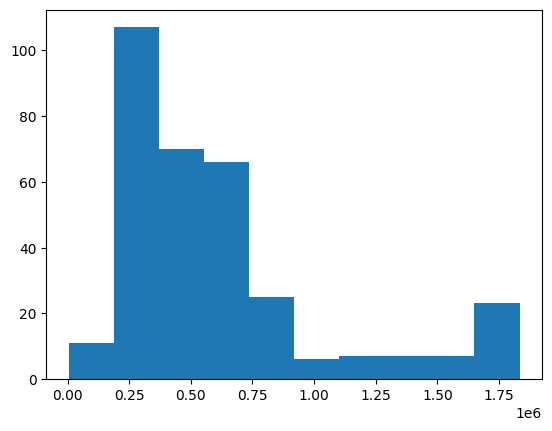

In [ ]:
plt.hist(df_final['dt'])

## Data Saving

In [ ]:
df_final.to_csv('NGC6822_LPV_Data_BaSTI_'+ Z_name +'.csv', index=False)

# SFR

In [ ]:
df_loc = pd.read_csv('/content/NGC_6822/Data_V3/Data_location.csv')

In [ ]:
df

,Ra(J2000) deg,Dec(J2000) deg,J,H,Ks,Types,Ref,R,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
0,296.183980,-14.780180,18.030,17.510,17.050000,O,Whitelock,89.990,0.980,-0.040800,0.910332,10.006171,1.014310e+10,5.297217,1.982516e+05
1,296.252290,-14.784750,17.290,16.540,16.010000,O,Whitelock,89.990,1.280,0.135880,1.367351,9.395580,2.486454e+09,5.891985,7.798031e+05
2,296.204150,-14.634860,16.380,15.910,15.390000,O,Whitelock,89.990,0.990,0.125900,1.336286,9.428250,2.680709e+09,5.850536,7.088205e+05
3,296.223640,-14.774730,16.240,15.580,15.060000,O,Whitelock,89.990,1.180,0.268783,1.856878,9.058413,1.143966e+09,6.262937,1.832049e+06
4,296.218160,-14.880350,16.100,15.530,15.020000,O,Whitelock,89.990,1.080,0.286249,1.933077,9.021905,1.051731e+09,6.257515,1.809319e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,296.044067,-14.905341,18.304,17.750,17.311000,C5.5,Kacharov,20.697,0.993,-0.097698,0.798550,10.211139,1.626068e+10,5.257694,1.810063e+05
325,296.003693,-14.974893,18.192,17.560,17.140000,C5.5,Kacharov,20.379,1.052,-0.060420,0.870122,10.076849,1.193574e+10,5.273768,1.878312e+05
326,295.993561,-14.990264,17.674,16.702,15.645319,C6.5,Kacharov,19.735,1.716,0.052430,1.128314,9.670321,4.680807e+09,5.542065,3.483891e+05
327,296.020050,-15.036669,17.551,17.008,16.619000,C8.2,Kacharov,19.639,0.932,0.051763,1.126582,9.672724,4.706778e+09,5.539664,3.464688e+05


/tmp/ipython-input-328085261.py:125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")


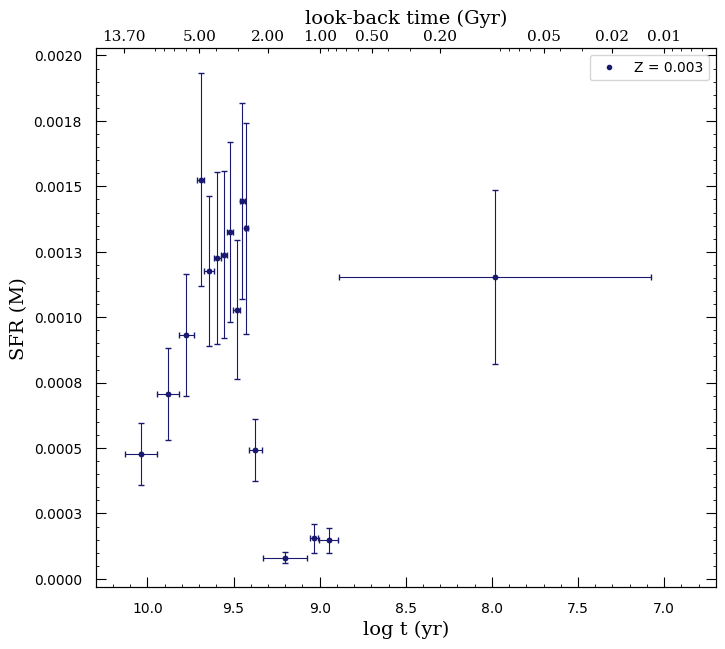

In [ ]:
df = df_final
df = df.merge(df_loc, how='inner', on = ['Ra(J2000) deg','Dec(J2000) deg'])
df = df[df['Whitelock'] == 1 ]

#Sorting By t (Age of LPV Stras)
df = df.sort_values(by='t', ascending=False)
df = df.reset_index()

#Finding Alpha
df['alpha'] = np.nan
for k in df.index:
  if df.loc[k,'M/Ms'] < 0.08 :
    df.loc[k,'alpha'] = 0.3
  elif df.loc[k,'M/Ms'] >= 0.5 :
    df.loc[k,'alpha'] = 2.3
  else :
    df.loc[k,'alpha'] = 1.3

bins_number = 14
bins_with_less_stars = 12
bins_pop = ([16]*(bins_number-bins_with_less_stars)) + ([15]*bins_with_less_stars)+[6,6,4]
bins_pop = [16,16,16,14,17,14,15,15,15,15,11,17,17,8,10,12]

#SFH Calcualtion
lower_index = 0
sub_integration = 0

sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                  + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                    + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

log_t = []
log_t_err = []

XI = []
XI_err = []

alpha =[]
M_lower_limit = []
M_upper_limit = []
log_t_lower_limit = []
log_t_upper_limit = []

for i in bins_pop :

  selected_df = df[lower_index:lower_index+i]

  # Calculating limitation of each bin
  M_lower_limit_ = selected_df.iloc[0]['M/Ms']
  M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
  alpha_ = selected_df.iloc[0]['alpha']
  log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
  log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

  # Adding to lists
  alpha.append(alpha_)
  M_lower_limit.append(M_lower_limit_)
  M_upper_limit.append(M_upper_limit_)
  log_t_lower_limit.append(log_t_lower_limit_)
  log_t_upper_limit.append(log_t_upper_limit_)

  # Calculating XI
  p1 = sum(1/selected_df['dt'])
  p2 = sub_integration
  p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)

  XI_ = p1 * p2 * (1/p3) / S_body
  XI_err_ = XI_ * ((i**0.5)/i)

  log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
  log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
  XI.append(XI_)
  XI_err.append(XI_err_)

  lower_index += i

# Making Data frame for SFH calculation
columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
          'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
          'Mean log(t) error' , 'XI' , 'XI error']

# Calling DataFrame constructor after zipping
# both lists, with columns specified
SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                              M_lower_limit,M_upper_limit,alpha,log_t,
                              log_t_err,XI,XI_err)), columns =columns)

#Plot
plt.figure(figsize = (8,7), dpi = 100)

plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
plt.ylabel('SFR (M)',{'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')

plt.minorticks_on()

xlim_lower_left, xlim_lower_right = 10.3,6.7
plt.xlim(xlim_lower_left,xlim_lower_right)

plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue',label = 'Z = 0.' + Z_name)
plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
            SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

plt.legend()

###########################################
ax2 = plt.twiny()

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim((10**xlim_lower_left)/10**9,(10**xlim_lower_right)/10**9)

ax2.set_xscale('log')

ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
ax2.xaxis.set_label_position('top')
ax2.yaxis.set_label_position('right')
ax2.set_xticks((13.7,5,2,1,0.5,0.2,0.05,0.02,0.01))
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.4f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
###########################################

#Saving Data
SFH_df.to_csv('NGC6822_SFH_Data_Bar_BaSTI_'+ Z_name +'.csv', index=False)
plt.savefig('SFR_BaSTI_Bar_BaSTI_'+Z_name+'.jpeg', bbox_inches='tight', dpi = 400)

In [ ]:
sum(bins_pop)

228

<>:92: SyntaxWarning: invalid escape sequence '\o'
<>:92: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-1579567185.py:92: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)',
/tmp/ipython-input-1579567185.py:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")


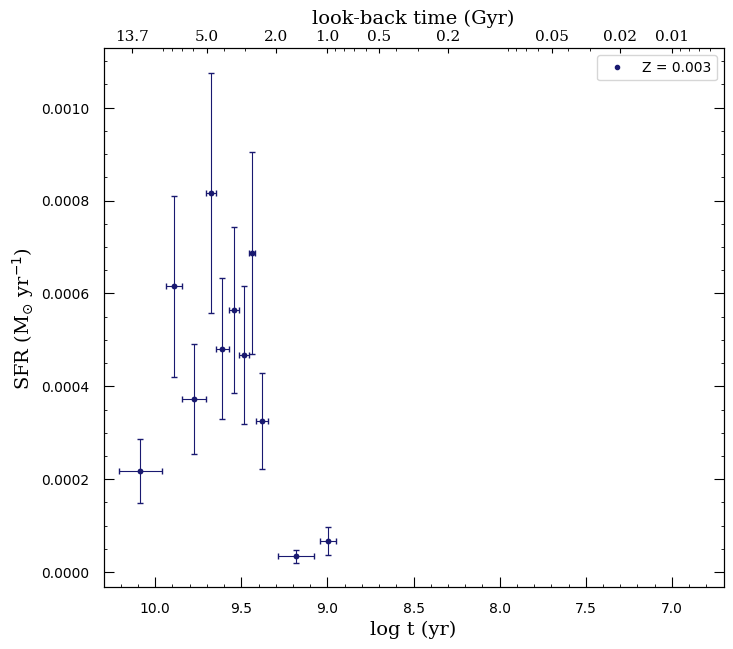

In [ ]:
df = df_final
df = df.merge(df_loc, how='inner', on = ['Ra(J2000) deg','Dec(J2000) deg'])
df = df[df['Whitelock'] == 0 ]

#Sorting By t (Age of LPV Stras)
df = df.sort_values(by='t', ascending=False)
df = df.reset_index()

#Finding Alpha
df['alpha'] = np.nan
for k in df.index:
  if df.loc[k,'M/Ms'] < 0.08 :
    df.loc[k,'alpha'] = 0.3
  elif df.loc[k,'M/Ms'] >= 0.5 :
    df.loc[k,'alpha'] = 2.3
  else :
    df.loc[k,'alpha'] = 1.3

bins_number = 9
bins_with_more_stars = 0
bins_pop = ([10]*(bins_number-bins_with_more_stars)) + ([11]*bins_with_more_stars) + [6,5]

#SFH Calcualtion
lower_index = 0
sub_integration = 0

sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                  + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                    + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

log_t = []
log_t_err = []

XI = []
XI_err = []

alpha =[]
M_lower_limit = []
M_upper_limit = []
log_t_lower_limit = []
log_t_upper_limit = []

for i in bins_pop :

  selected_df = df[lower_index:lower_index+i]

  # Calculating limitation of each bin
  M_lower_limit_ = selected_df.iloc[0]['M/Ms']
  M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
  alpha_ = selected_df.iloc[0]['alpha']
  log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
  log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

  # Adding to lists
  alpha.append(alpha_)
  M_lower_limit.append(M_lower_limit_)
  M_upper_limit.append(M_upper_limit_)
  log_t_lower_limit.append(log_t_lower_limit_)
  log_t_upper_limit.append(log_t_upper_limit_)

  # Calculating XI
  p1 = sum(1/selected_df['dt'])
  p2 = sub_integration
  p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)

  XI_ = p1 * p2 * (1/p3) / S_body
  XI_err_ = XI_ * ((i**0.5)/i)

  log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
  log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
  XI.append(XI_)
  XI_err.append(XI_err_)

  lower_index += i

# Making Data frame for SFH calculation
columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
          'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
          'Mean log(t) error' , 'XI' , 'XI error']

# Calling DataFrame constructor after zipping
# both lists, with columns specified
SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                              M_lower_limit,M_upper_limit,alpha,log_t,
                              log_t_err,XI,XI_err)), columns =columns)


#Plot
plt.figure(figsize = (8,7), dpi = 100)

plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)',
          {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')

plt.minorticks_on()

xlim_lower_left, xlim_lower_right = 10.3,6.7
plt.xlim(xlim_lower_left,xlim_lower_right)

plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue', label = 'Z = 0.' + Z_name)
plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
            SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

plt.legend()

###########################################
ax2 = plt.twiny()

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim((10**xlim_lower_left)/10**9,(10**xlim_lower_right)/10**9)

ax2.set_xscale('log')

ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
ax2.xaxis.set_label_position('top')
ax2.yaxis.set_label_position('right')
ax2.set_xticks((13.7,5,2,1,0.5,0.2,0.05,0.02,0.01))
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.4f'))
#ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
###########################################

#Saving Data
SFH_df.to_csv('NGC6822_SFH_Data_Outer_Region_BaSTI_'+ Z_name +'.csv', index=False)
plt.savefig('SFR_BaSTI_Outer_Region_BaSTI_'+Z_name+'.jpeg', bbox_inches='tight', dpi = 400)